In [57]:
import numpy as np
from pandas import *
import seaborn as sns
from csv import *
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(1541)

# 1. 3개의 성(Sex)에 따른 EDA

In [58]:
import pandas as pd
import numpy as np
import csv

df = pd.read_csv('/content/abalone.csv')

In [59]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [60]:
from scipy.stats import skew

numerical_features = df.select_dtypes(include=[np.number]).columns #숫자 데이터 컬럼 추출
skew_values = skew(df[numerical_features], nan_policy = 'omit')
dummy = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
dummy.sort_values(by = 'Skewness degree' , ascending = False)

# 왜도 (Skewness)
# - 분포의 비대칭도.

# - 정규분포 = 왜도 0

# - 왼쪽으로 치우침 = 왜도 > 0

# - 오른쪽으로 치우침 = 왜도 < 0

,Features,Skewness degree
2,Height,3.127694
7,Rings,1.113702
4,Shucked weight,0.718840
6,Shell weight,0.620704
5,Viscera weight,0.591640
3,Whole weight,0.530768
1,Diameter,-0.608979
0,Length,-0.639643


Height가 매우 왼쪽으로 치우쳐져 있고 Rings 또한 왼쪽으로 치우쳐져 있습니다.



In [61]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [62]:
df.info() #null값은 없습니다!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ffa813590>,
      dtype=object)

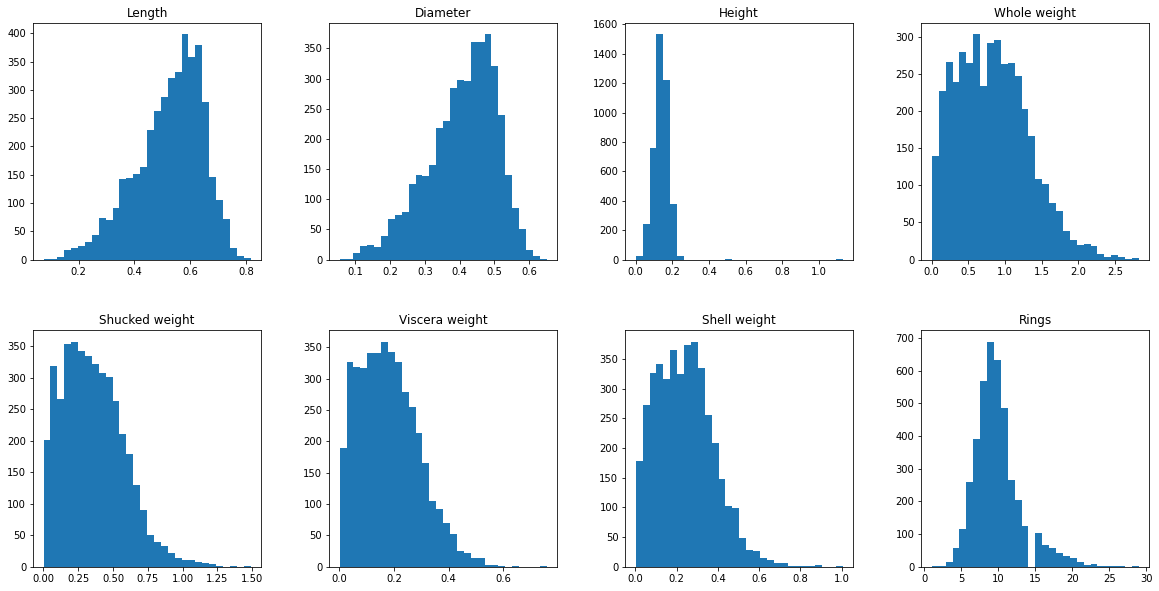

In [63]:
df.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)
#length: Longest shell
#Diameter: 길이에 대한 수직
#Height: 껍질 안에 고기
#Whole weight: 전복 무게
#Shucked weight: 전복 알맹이 무게
#Viscera weight: 장 무게(피 흘린 후)
#Shell weight: 죽은 후 무게
#Ring: 나이 -> 1.5나이? 1년당?

In [64]:
print(df['Sex'].value_counts())
# M, I(미성숙), F
# 거의 3개의 성이 고루 분포되어있다.

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


In [65]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


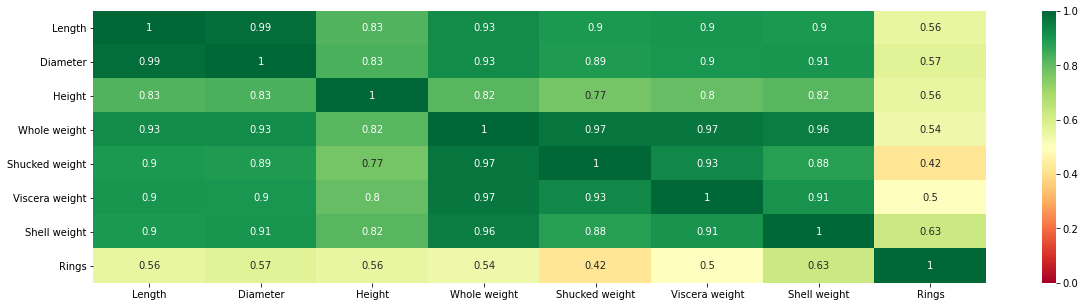

In [66]:
corr = df.corr()

plt.figure(figsize=(20,5))
sns.heatmap(corr, cmap = "RdYlGn", annot = True, vmin=0, vmax=1) 

whole weight(전복 무게)는 Rings(나이)를 제외한 나머지 column들과 매우 상관관계가 비례함을 알 수 있습니다.

Rings(나이)를 제외한 Height(껍질 안의 고기)는 다른 column들에 비해 상관관계가 낮은 편이다.

Rings(나이)는 그나마 Shell weight와 상관관계가 있지만 특별히 더 상관관계가 있다고는 생각이 들지 않습니다.



In [67]:
#Sex(성)을 기준으로 각 컬럼 평균 보기
df.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight', 'Rings']].mean()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,,,,,,,,
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,11.129304
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,7.890462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,10.705497


전반적으로 Female의 대부분 column이 더 높다.

전반적으로 Immature의 대부분 column이 낮다.

In [68]:
sex_M=pd.DataFrame(columns=['Sex','Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight', 'Rings'])
sex_F=pd.DataFrame(columns=['Sex','Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight', 'Rings'])
sex_I=pd.DataFrame(columns=['Sex','Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight', 'Rings'])

In [69]:
for i in range(len(df)):
  if df.loc[i,'Sex']=='M':
    sex_M=sex_M.append(df.loc[i],ignore_index=True)
  if df.loc[i,'Sex']=='F':
    sex_F=sex_F.append(df.loc[i],ignore_index=True)
  if df.loc[i,'Sex']=='I':
    sex_I=sex_I.append(df.loc[i],ignore_index=True)

In [70]:
sex_M.drop(['Sex'],axis=1,inplace=True)

In [71]:
sex_F.drop(['Sex'],axis=1,inplace=True)

In [72]:
sex_I.drop(['Sex'],axis=1,inplace=True)

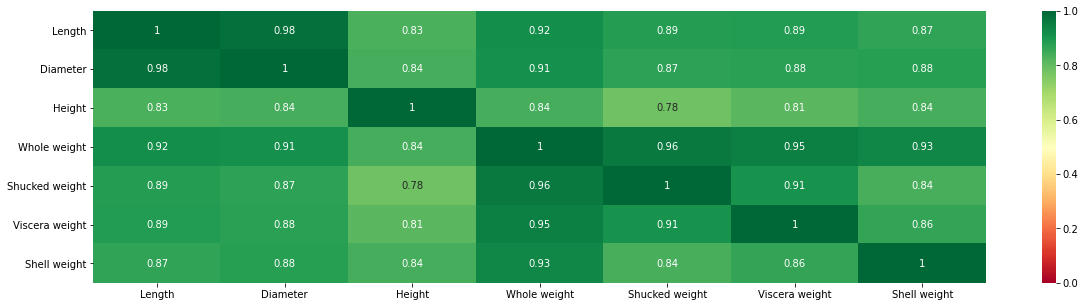

In [73]:
corr = sex_M.corr()

plt.figure(figsize=(20,5))
sns.heatmap(corr, cmap = "RdYlGn", annot = True, vmin=0, vmax=1) 

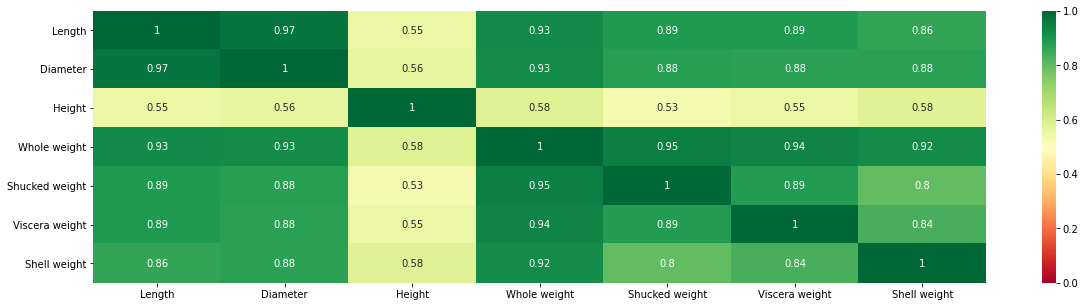

In [74]:
corr = sex_F.corr()

plt.figure(figsize=(20,5))
sns.heatmap(corr, cmap = "RdYlGn", annot = True, vmin=0, vmax=1) 

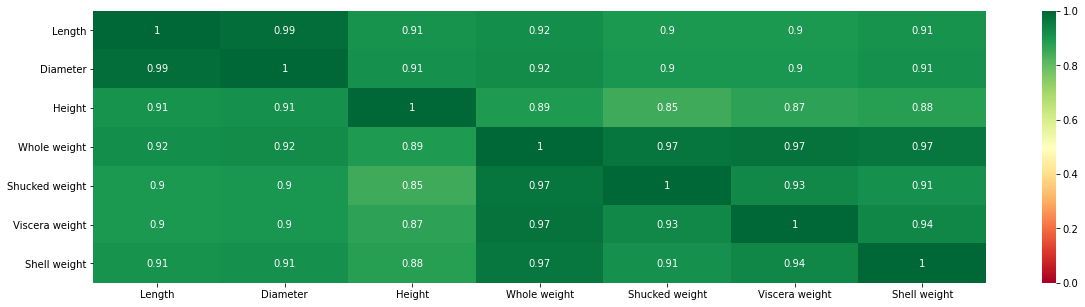

In [75]:
corr = sex_I.corr()

plt.figure(figsize=(20,5))
sns.heatmap(corr, cmap = "RdYlGn", annot = True, vmin=0, vmax=1) 

3개의 성에 대한 heatmap을 비교해보니 Female의 Height는 다른 column과 상관관계가 매우 낮다. -> 전체 전복 Height가 다른 column과 낮은 큰 이유


I의 성은 대부분 column 간의 상관관계가 매우 유사하다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

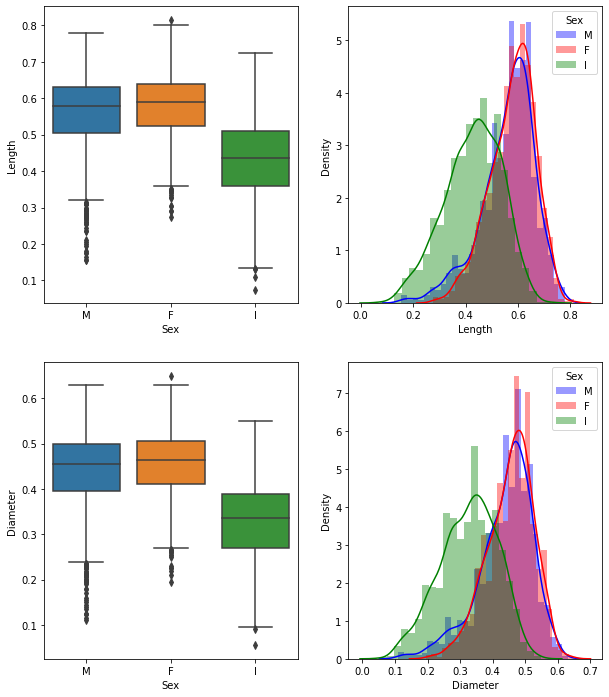

In [76]:
fig=plt.figure(figsize=(10, 12))
plt.subplot(2, 2, 1)
sns.boxplot(y = df["Length"], x = "Sex", data=df)

plt.subplot(2,2,2)
sns.distplot(df[df.Sex == "M"]["Length"],color="blue", label="M")
sns.distplot(df[df.Sex == "F"]["Length"],color="red", label="F")
sns.distplot(df[df.Sex == "I"]["Length"],color="green", label="I")
plt.legend(title="Sex")

plt.subplot(2, 2, 3)
sns.boxplot(y = df["Diameter"], x = "Sex", data=df)

plt.subplot(2,2,4)
sns.distplot(df[df.Sex == "M"]["Diameter"],color="blue", label="M")
sns.distplot(df[df.Sex == "F"]["Diameter"],color="red", label="F")
sns.distplot(df[df.Sex == "I"]["Diameter"],color="green", label="I")
plt.legend(title="Sex")

plt.show()

I의 Length의 분포가 다른 성에 비해 매우 넓다.

M의 Length의 outlier가 매우 많다.(밑으로)

I<M<F

-------------------------------------------------------------
Length와 Diameter와 분포가 유사



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

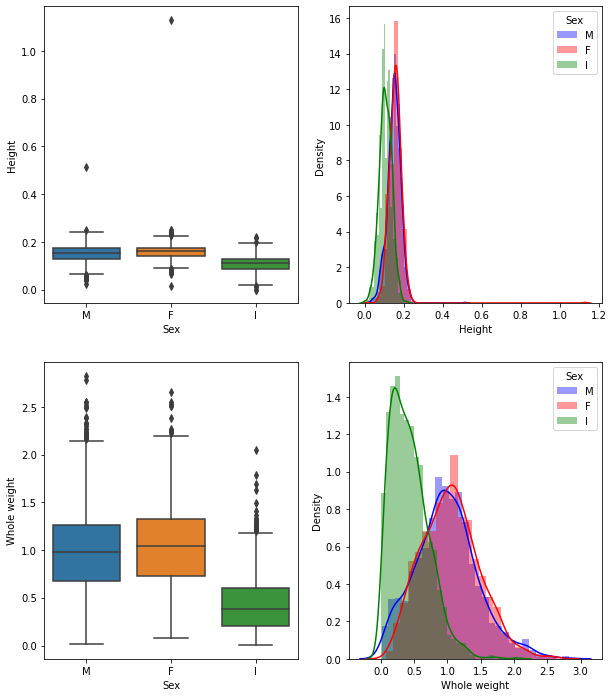

In [77]:
fig=plt.figure(figsize=(10, 12))
plt.subplot(2, 2, 1)
sns.boxplot(y = df["Height"], x = "Sex", data=df)

plt.subplot(2,2,2)
sns.distplot(df[df.Sex == "M"]["Height"],color="blue", label="M")
sns.distplot(df[df.Sex == "F"]["Height"],color="red", label="F")
sns.distplot(df[df.Sex == "I"]["Height"],color="green", label="I")
plt.legend(title="Sex")

plt.subplot(2, 2, 3)
sns.boxplot(y = df["Whole weight"], x = "Sex", data=df)

plt.subplot(2,2,4)
sns.distplot(df[df.Sex == "M"]["Whole weight"],color="blue", label="M")
sns.distplot(df[df.Sex == "F"]["Whole weight"],color="red", label="F")
sns.distplot(df[df.Sex == "I"]["Whole weight"],color="green", label="I")
plt.legend(title="Sex")

plt.show()

성으로 봤을 때 -> Height 0.4 이하로 정해 outlier 제거 필요(M의 0.5로 추정되는 값과 F의 1.0 넘는 수치)

Height도 위와 같은 분포도를 보여준다. -> F(1.13)에서 아주 큰 이상치 하나를 보여준다.

Whole weight에서는 위와 다르게 I의 분포가 제일  밀집되어 있다.
-> 위와 다르게 M의 이상치가 다른 성에 비해 더 높다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

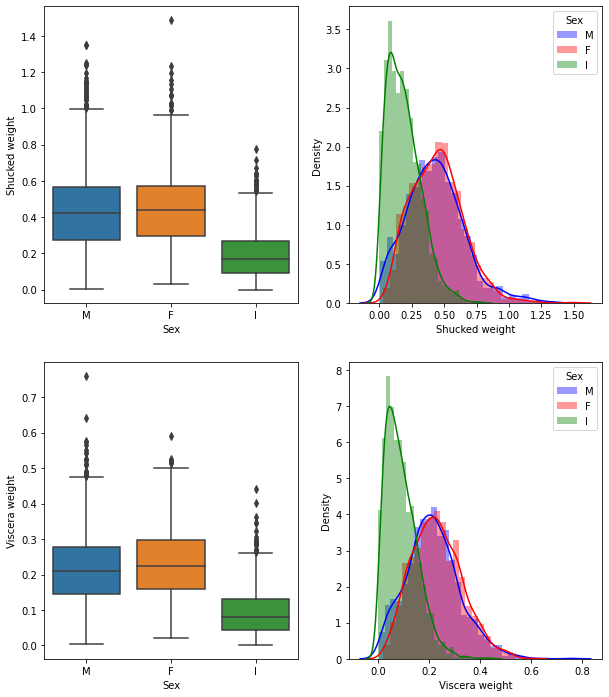

In [78]:
fig=plt.figure(figsize=(10, 12))
plt.subplot(2, 2, 1)
sns.boxplot(y = df["Shucked weight"], x = "Sex", data=df)

plt.subplot(2,2,2)
sns.distplot(df[df.Sex == "M"]["Shucked weight"],color="blue", label="M")
sns.distplot(df[df.Sex == "F"]["Shucked weight"],color="red", label="F")
sns.distplot(df[df.Sex == "I"]["Shucked weight"],color="green", label="I")
plt.legend(title="Sex")

plt.subplot(2, 2, 3)
sns.boxplot(y = df["Viscera weight"], x = "Sex", data=df)

plt.subplot(2,2,4)
sns.distplot(df[df.Sex == "M"]["Viscera weight"],color="blue", label="M")
sns.distplot(df[df.Sex == "F"]["Viscera weight"],color="red", label="F")
sns.distplot(df[df.Sex == "I"]["Viscera weight"],color="green", label="I")
plt.legend(title="Sex")

plt.show()

shucked weight에서 F의 1.4 넘는 데이터와 M의 1.3 넘는 데이터 삭제 요망

Viscera weight에서는 M의 0.6 넘는 2개 데이터와 F의 0.6정도 되는 데이터 삭제 요망

위 두 개의 column은 whole weight와 유사하고 I가 나머지 2개 중에 제일 밀집되어 있다.

분포도는 이때까지 그래프 모두 비슷

M과 F 거의 분포 비슷 -> shucked weight F의 이상치가 눈에 띄게 하나 outlier 보임

->Viscera weight에서는 M의 이상치가 눈에 띄게 보임

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

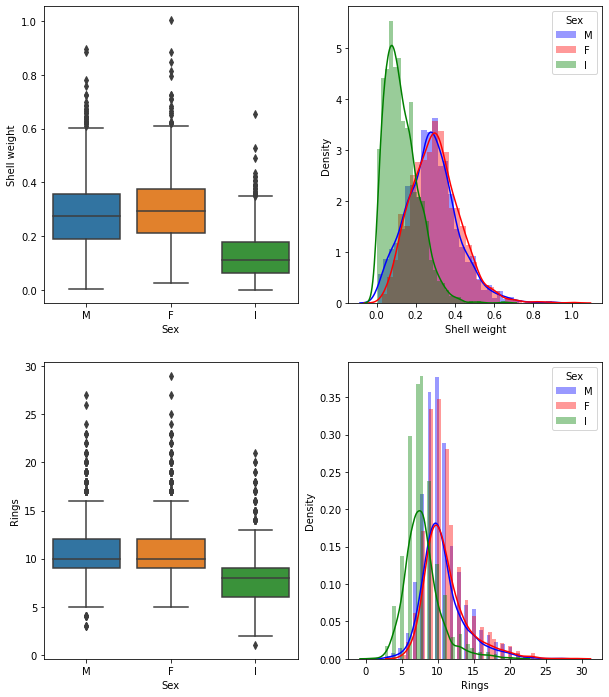

In [79]:
fig=plt.figure(figsize=(10, 12))
plt.subplot(2, 2, 1)
sns.boxplot(y = df["Shell weight"], x = "Sex", data=df)

plt.subplot(2,2,2)
sns.distplot(df[df.Sex == "M"]["Shell weight"],color="blue", label="M")
sns.distplot(df[df.Sex == "F"]["Shell weight"],color="red", label="F")
sns.distplot(df[df.Sex == "I"]["Shell weight"],color="green", label="I")
plt.legend(title="Sex")

plt.subplot(2, 2, 3)
sns.boxplot(y = df["Rings"], x = "Sex", data=df)

plt.subplot(2,2,4)
sns.distplot(df[df.Sex == "M"]["Rings"],color="blue", label="M")
sns.distplot(df[df.Sex == "F"]["Rings"],color="red", label="F")
sns.distplot(df[df.Sex == "I"]["Rings"],color="green", label="I")
plt.legend(title="Sex")

plt.show()

Shell weight에서 F의 1.0 데이터와 I의 0.6 넘는 데이터 삭제 요망

앞의 분포도와 유사한 I가 가장 적고 그 다음 M과 F

Shell weight에서는 I의 분포도가 밀집, Rings는 분포 밀집도는 유사하나 I과 M과 F에 비해 분포 위치가 낮음을 알 수 있다.

In [80]:
from scipy import stats # 표준화된 Z값이 95% 신뢰구간 내에 있는 것으로 그 데이터만 선택하여 outlier를 제거할 수 있다.
'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight', 'Rings'
df_zscore=pd.DataFrame()
df_zscore['Sex']=df['Sex']
df_zscore['Length']=stats.zscore(df['Length'])
df_zscore['Diameter']=stats.zscore(df['Diameter'])
df_zscore['Height']=stats.zscore(df['Height'])
df_zscore['Whole weight']=stats.zscore(df['Whole weight'])
df_zscore['Shucked weight']=stats.zscore(df['Shucked weight'])
df_zscore['Viscera weight']=stats.zscore(df['Viscera weight'])
df_zscore['Shell weight']=stats.zscore(df['Shell weight'])
df_zscore['Rings']=stats.zscore(df['Rings'])
#zscore는 데이터 평균을 빼고 표준편차를 나눠준다.

In [81]:
from sklearn.manifold import TSNE
import altair as alt
# Sex(성) 당 column 표준화(zscore)한 dataframe t-SNE (같은 종류의 점 끼리 거리로 가까움을 알고 다른 종류끼리도 거리로 가까움을 알기 위해)
# 친밀도

np.random.seed(1)

appID_matrix = df_zscore.iloc[:, 1:].values
appID_tsne_result = TSNE(learning_rate=300, init='pca').fit_transform(appID_matrix)

df_appID_tsne_result = (
  pd.DataFrame(appID_tsne_result, columns=['V1', 'V2'])
    .assign(genreID = df['Sex'])
)
(df_appID_tsne_result.pipe(alt.Chart, width=800, height=400).mark_point().encode(x='V1:Q', y='V2:Q', color='genreID:N'))

alt.Chart(...)

In [82]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_MinMax_train = min_max_scaler.fit_transform(df.iloc[:, 1:])
X=pd.DataFrame(X_MinMax_train)
X['Sex']=df['Sex']
X

,0,1,2,3,4,5,6,7,Sex
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000,M
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286,M
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714,F
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429,M
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286,I
...,...,...,...,...,...,...,...,...,...
4172,0.662162,0.663866,0.146018,0.313441,0.248151,0.314022,0.246637,0.357143,F
4173,0.695946,0.647059,0.119469,0.341420,0.294553,0.281764,0.258097,0.321429,M
4174,0.709459,0.705882,0.181416,0.415796,0.352724,0.377880,0.305431,0.285714,M
4175,0.743243,0.722689,0.132743,0.386931,0.356422,0.342989,0.293473,0.321429,F


In [83]:
np.random.seed(1)

appID_matrix = X.iloc[:, 0:8].values
appID_tsne_result = TSNE(learning_rate=300, init='pca').fit_transform(appID_matrix)

df_appID_tsne_result = (
  pd.DataFrame(appID_tsne_result, columns=['V1', 'V2'])
    .assign(genreID = X['Sex'])
)
(df_appID_tsne_result.pipe(alt.Chart, width=800, height=400).mark_point().encode(x='V1:Q', y='V2:Q', color='genreID:N'))

alt.Chart(...)

t-sne로 I의 성이 다른 성에 비해 밀집되어 친밀도가 높음을 알 수 있습니다.

f와 M은 유사합니다.

In [84]:
print(sex_F['Height'].max())
print(sex_F['Whole weight'].max())

1.13
2.657


In [85]:
sex_F.loc[(sex_F['Height']==1.13)] #Height만 매우 높지 나머지는 그저 그럼
#이 행이 Height와 다른 column과의 상관관계에 엄청난 영향을 미친다. -> 이 이상치는 필히 회귀분석, 분류에서 빼야되는 부분이다.

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
620,0.455,0.355,1.13,0.594,0.332,0.116,0.1335,8


In [86]:
Q1 = sex_F.quantile(0.25)
Q3 = sex_F.quantile(0.75)
IQR = Q3 - Q1
print("outlier of F")
print(((sex_F < (Q1 - 1.5 * IQR)) | (sex_F > (Q3 + 1.5 * IQR))).sum())

outlier of F
Diameter          16
Height            23
Length            15
Rings              0
Shell weight      19
Shucked weight    14
Viscera weight     8
Whole weight      11
dtype: int64


In [87]:
Q1 = sex_M.quantile(0.25)
Q3 = sex_M.quantile(0.75)
IQR = Q3 - Q1
print("outlier of M")
print(((sex_M < (Q1 - 1.5 * IQR)) | (sex_M > (Q3 + 1.5 * IQR))).sum())

outlier of M
Diameter          43
Height            15
Length            41
Rings              0
Shell weight      25
Shucked weight    30
Viscera weight    22
Whole weight      29
dtype: int64


In [88]:
Q1 = sex_I.quantile(0.25)
Q3 = sex_I.quantile(0.75)
IQR = Q3 - Q1
print("outlier of I")
print(((sex_I < (Q1 - 1.5 * IQR)) | (sex_I > (Q3 + 1.5 * IQR))).sum())

outlier of I
Diameter           2
Height             7
Length             4
Rings              0
Shell weight      20
Shucked weight    20
Viscera weight    20
Whole weight      21
dtype: int64


## outlier 제거 후

In [89]:
df1=pd.DataFrame(df)
df1

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [90]:
df1.drop(df1[(df1['Height']> 0.4)].index, inplace=True)

In [91]:
df1.drop(df1[(df1['Shucked weight']> 1.4) & (df1['Sex']=='F')].index, inplace=True)
df1.drop(df1[(df1['Shucked weight']> 1.3) & (df1['Sex']=='M')].index, inplace=True)
df1.drop(df1[(df1['Viscera weight']> 0.6) & (df1['Sex']=='M')].index, inplace=True)
df1.drop(df1[(df1['Viscera weight']> 0.58) & (df1['Sex']=='F')].index, inplace=True)
df1.drop(df1[(df1['Shell weight']> 1.0) & (df1['Sex']=='F')].index, inplace=True)
df1.drop(df1[(df1['Shell weight']> 0.6) & (df1['Sex']=='I')].index, inplace=True)

In [92]:
df1=df1.reset_index()
df1 = df1.drop('index', axis=1)
df1

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4163,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4164,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4165,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4166,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [93]:
from scipy import stats # 표준화된 Z값이 95% 신뢰구간 내에 있는 것으로 그 데이터만 선택하여 outlier를 제거할 수 있다.
df1_zscore=pd.DataFrame()
df1_zscore['Sex']=df1['Sex']
df1_zscore['Length']=stats.zscore(df1['Length'])
df1_zscore['Diameter']=stats.zscore(df1['Diameter'])
df1_zscore['Height']=stats.zscore(df1['Height'])
df1_zscore['Whole weight']=stats.zscore(df1['Whole weight'])
df1_zscore['Shucked weight']=stats.zscore(df1['Shucked weight'])
df1_zscore['Viscera weight']=stats.zscore(df1['Viscera weight'])
df1_zscore['Shell weight']=stats.zscore(df1['Shell weight'])
df1_zscore['Rings']=stats.zscore(df1['Rings'])
#zscore는 데이터 평균을 빼고 표준편차를 나눠준다.

In [94]:
from sklearn.manifold import TSNE
import altair as alt
# Sex(성) 당 column 표준화(zscore)한 dataframe t-SNE (같은 종류의 점 끼리 거리로 가까움을 알고 다른 종류끼리도 거리로 가까움을 알기 위해)
# 친밀도

np.random.seed(1)

appID_matrix = df1_zscore.iloc[:, 1:].values
appID_tsne_result = TSNE(learning_rate=300, init='pca').fit_transform(appID_matrix)

df_appID_tsne_result = (
  pd.DataFrame(appID_tsne_result, columns=['V1', 'V2'])
    .assign(genreID = df1['Sex'])
)
(df_appID_tsne_result.pipe(alt.Chart, width=800, height=400).mark_point().encode(x='V1:Q', y='V2:Q', color='genreID:N'))

alt.Chart(...)

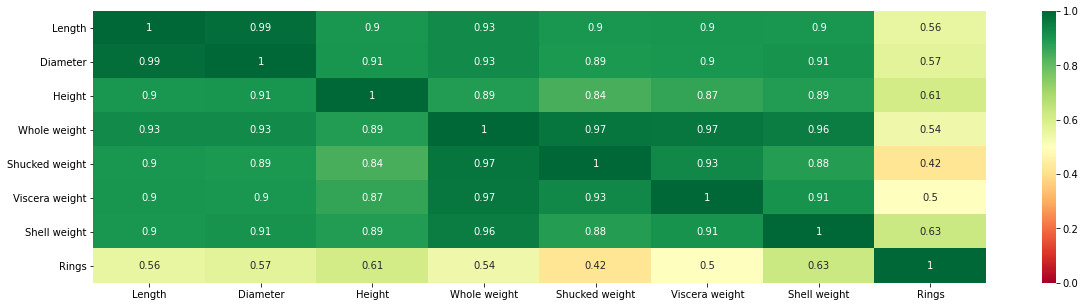

In [103]:
corr = df1.corr()

plt.figure(figsize=(20,5))
sns.heatmap(corr, cmap = "RdYlGn", annot = True, vmin=0, vmax=1) 

outlier 제거 후에는 Height와 다른 컬럼 간의 상관관계가 좋아졌다.

# age별 abalone 비교

In [95]:
import pandas as pd
import numpy as np
import csv

df = pd.read_csv('/content/abalone.csv')

In [96]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [113]:
tmp=pd.get_dummies(df['Sex'])
tmp

,F,I,M
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
...,...,...,...
4172,1,0,0
4173,0,0,1
4174,0,0,1
4175,1,0,0


In [120]:
df_onehot=pd.DataFrame()
df_onehot['F']=tmp['F']
df_onehot['I']=tmp['I']
df_onehot['M']=tmp['M']
df_onehot['Length']=df['Length']
df_onehot['Diameter']=df['Diameter']
df_onehot['Height']=df['Height']
df_onehot['Whole weight']=df['Whole weight']
df_onehot['Shucked weight']=df['Shucked weight']
df_onehot['Viscera weight']=df['Viscera weight']
df_onehot['Shell weight']=df['Shell weight']
df_onehot['Rings']=df['Rings']
df_onehot
#성별 one hot encoding

,F,I,M,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,1,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...,...
4172,1,0,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0,0,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0,0,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,1,0,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [121]:
#나이별 성을 제외한 속성 평균
df_onehot.groupby('Rings')[['F','I','M']].sum().sort_values(by = 'Rings',ascending = False)

,F,I,M
Rings,,,
29,1.0,0.0,0.0
27,1.0,0.0,1.0
26,0.0,0.0,1.0
25,1.0,0.0,0.0
24,1.0,0.0,1.0
23,6.0,0.0,3.0
22,3.0,0.0,3.0
21,7.0,1.0,6.0
20,12.0,2.0,12.0


F와 M의 수는 연령별로 11까지 M이 조금 더 많고 그 이후는 매우 비슷하다.

In [104]:
#나이별 성을 제외한 속성 평균
df.groupby('Rings')[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight']].mean().sort_values(by = 'Rings',ascending = False)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
Rings,,,,,,,
29,0.700000,0.585000,0.185000,1.807500,0.705500,0.321500,0.475000
27,0.607500,0.500000,0.202500,1.698000,0.539000,0.298000,0.705000
26,0.600000,0.495000,0.195000,1.057500,0.384000,0.190000,0.375000
25,0.645000,0.490000,0.215000,1.406000,0.426500,0.228500,0.510000
24,0.695000,0.540000,0.200000,1.798750,0.600250,0.332750,0.632500
23,0.587222,0.463889,0.172778,1.170389,0.399444,0.254833,0.370556
22,0.595000,0.472500,0.189167,1.221250,0.405000,0.217167,0.390000
21,0.618214,0.485357,0.171071,1.250607,0.447464,0.246607,0.444643
20,0.603654,0.482308,0.173846,1.251750,0.458115,0.251135,0.425885


나이가 올라갈수록 Length는 11까지 오르다 그 위의 나이는 왔다갔다 함

나이가 올라갈수록 Diameter는 11까지 오르다 그 위의 나이는 왔다갔다 함

나이가 올라갈수록 Height는 12까지 오르다 그 위의 나이는 왔다갔다 함

나이가 올라갈수록 Whole height는 11까지 오르다 그 위의 나이는 왔다갔다 함

나이가 올라갈수록 Shucked weight는 11까지 오르다 그 위의 나이는 왔다갔다 함

나이가 올라갈수록 Viscera weight는 11까지 오르다 그 위의 나이는 왔다갔다 함

나이가 올라갈수록 Shell weight는 12까지 오르다 그 위의 나이는 왔다갔다 함


In [97]:
print(df['Rings'].value_counts())
#나이별 분포

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64


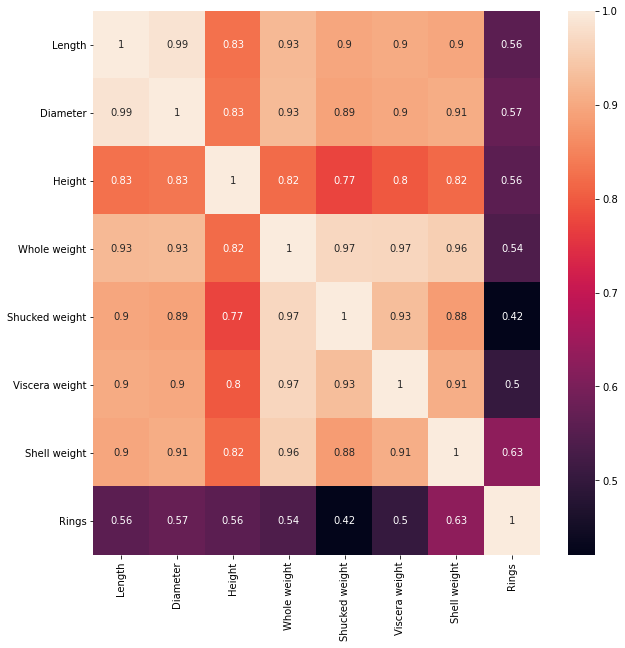

In [98]:
plt.figure(figsize=(10, 10))
corr = df.corr()
_ = sns.heatmap(corr, annot=True)

다시 heatmap으로 상관관계를 그려봄

<Figure size 1440x360 with 0 Axes>

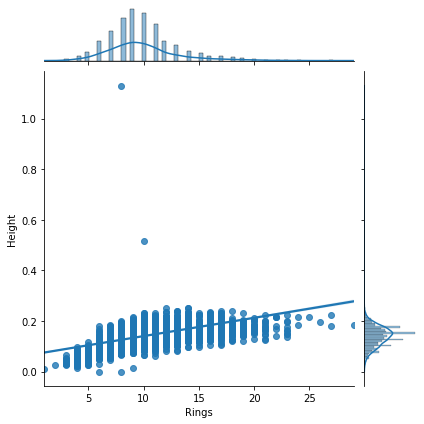

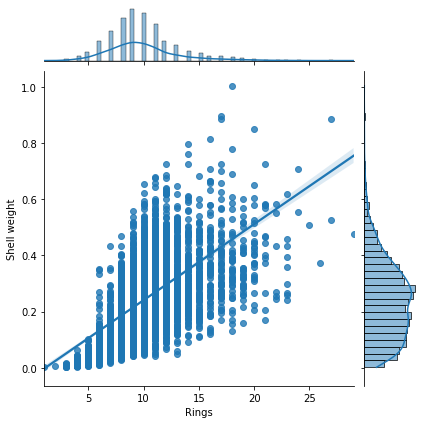

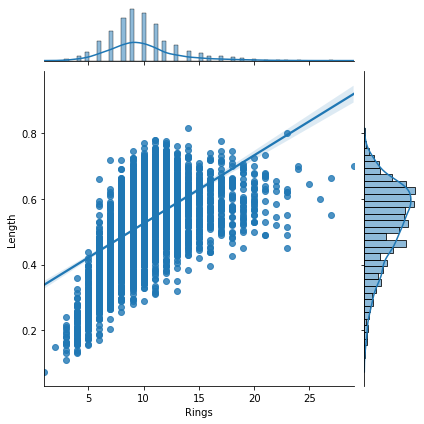

In [99]:
plt.figure(figsize=(20, 5))

#회귀선 그래프 중심으로 그래프 그리기 : 자료의 증가, 감소 추세를 확인하기에도 회귀분석은 유용
_ = sns.jointplot(data=df, x='Rings', y='Height', kind='reg')
_ = sns.jointplot(data=df, x='Rings', y='Shell weight', kind='reg')
_ = sns.jointplot(data=df, x='Rings', y='Length', kind='reg')

<Figure size 1440x360 with 0 Axes>

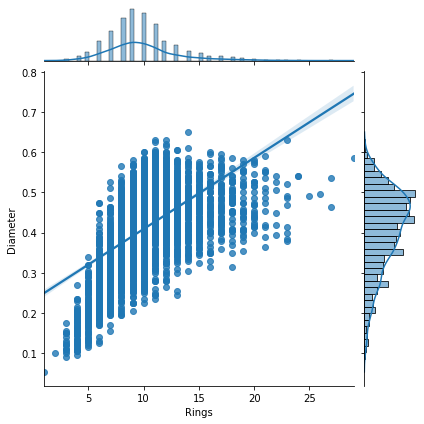

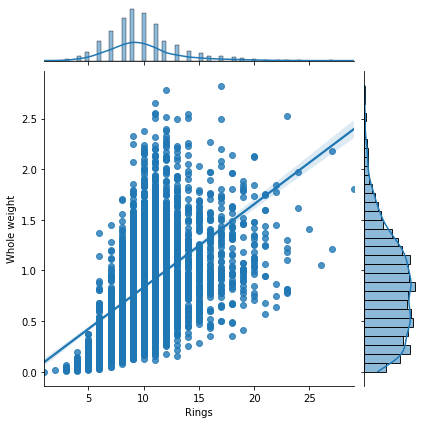

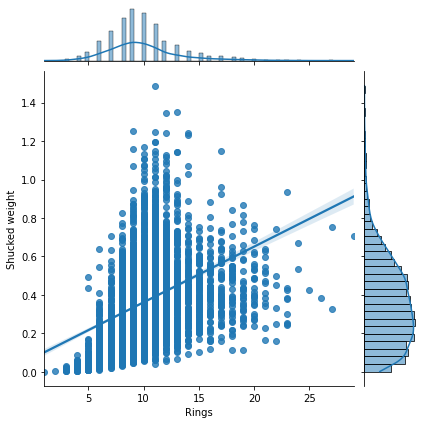

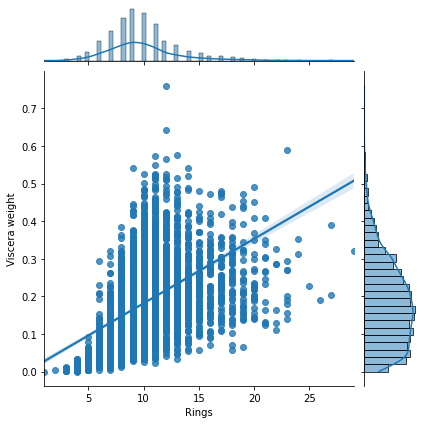

In [100]:
plt.figure(figsize=(20, 5))
_ = sns.jointplot(data=df, x='Rings', y='Diameter', kind='reg')
_ = sns.jointplot(data=df, x='Rings', y='Whole weight', kind='reg')
_ = sns.jointplot(data=df, x='Rings', y='Shucked weight', kind='reg')
_ = sns.jointplot(data=df, x='Rings', y='Viscera weight', kind='reg')

Rings 당 모든 column을 비교해보니 대략 12부터 분산 되는 경우를 발견

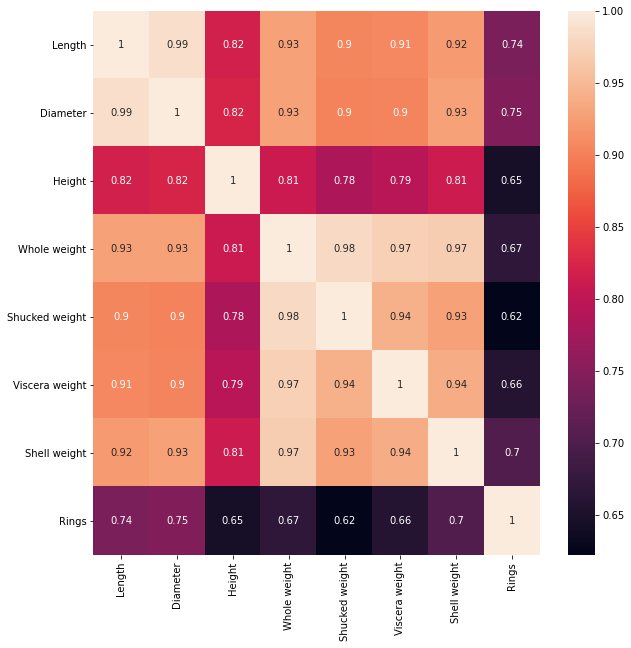

In [124]:
df011 = df[df['Rings'] < 12]

plt.figure(figsize=(10, 10))
corr = df011.corr()
_ = sns.heatmap(corr, annot=True)

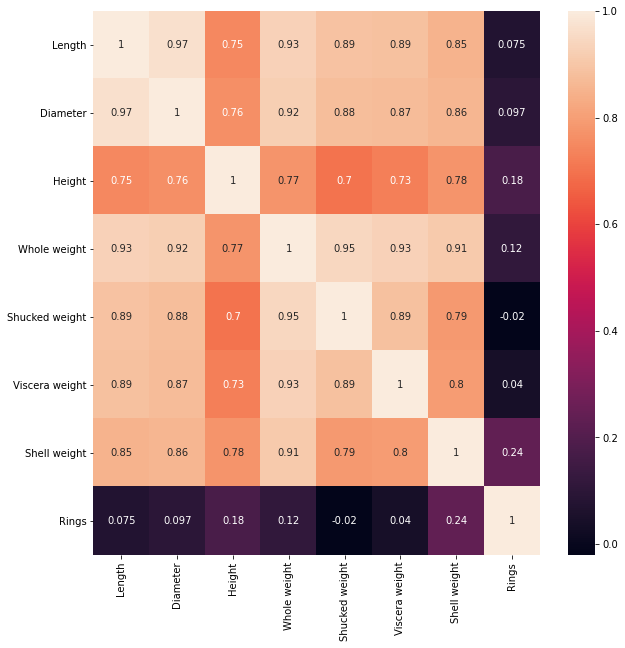

In [125]:
df12 = df[df['Rings'] > 11]

plt.figure(figsize=(10, 10))
corr = df12.corr()
_ = sns.heatmap(corr, annot=True)

확연히 나이 12이상을 포함 안 한거랑 한거랑의 나이와 다른 컬럼간의 상관관계는 많이 차이 나는 것을 확인

**나이별 0~11 애들 분석**

<Figure size 1440x360 with 0 Axes>

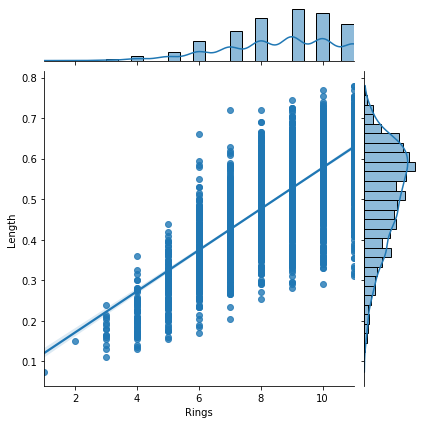

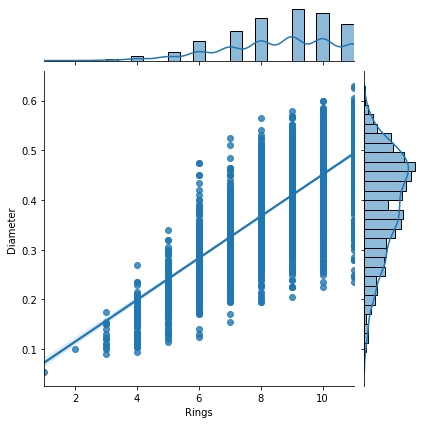

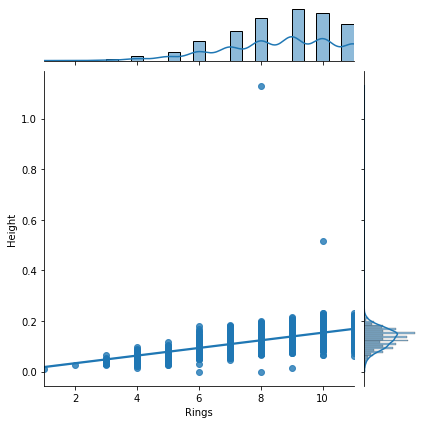

In [126]:
plt.figure(figsize=(20, 5))

_ = sns.jointplot(data=df011, x='Rings', y='Length',  kind='reg')
_ = sns.jointplot(data=df011, x='Rings', y='Diameter', kind='reg')
_ = sns.jointplot(data=df011, x='Rings', y='Height', kind='reg')

outlier를 제외하면 Height,Diameter, Length는 매우 유사한 분포를 띈다. 0에서 11살까지 나이가 찰수록 계속 증가하는 평균값, 중앙값 등이 보인다.


<Figure size 1440x360 with 0 Axes>

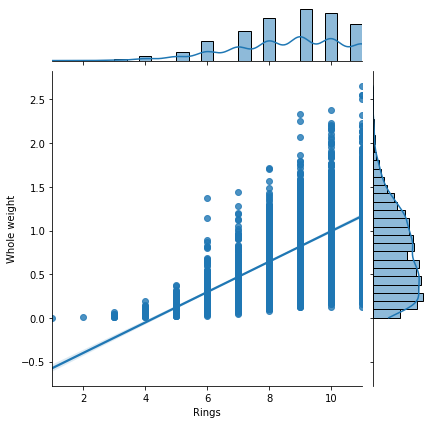

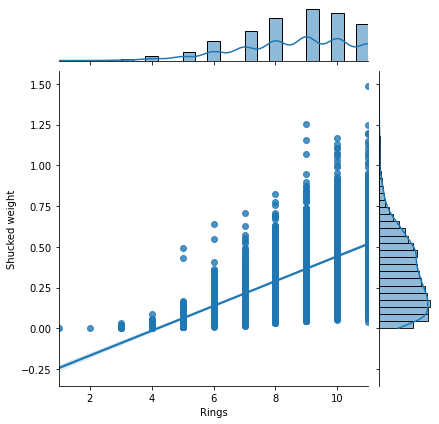

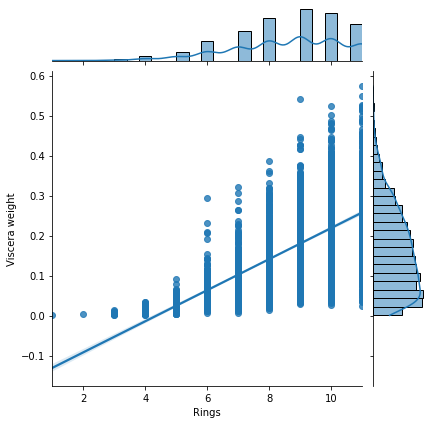

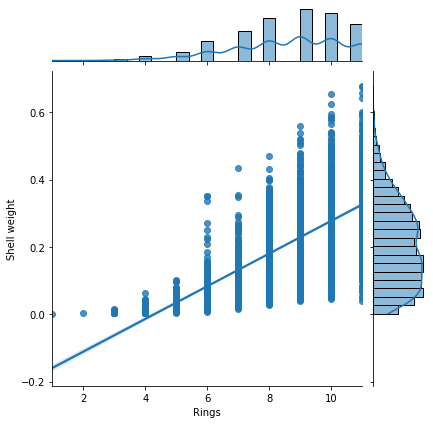

In [127]:
plt.figure(figsize=(20, 5))
_ = sns.jointplot(data=df011, x='Rings', y='Whole weight',  kind='reg')
_ = sns.jointplot(data=df011, x='Rings', y='Shucked weight', kind='reg')
_ = sns.jointplot(data=df011, x='Rings', y='Viscera weight', kind='reg')
_ = sns.jointplot(data=df011, x='Rings', y='Shell weight', kind='reg')

outlier를 제외하면 나머지 컬럼도 매우 유사한 분포를 띈다. 0에서 11살까지 나이가 찰수록 계속 증가하는 평균값, 중앙값 등이 보인다.


**11살까지 계속적으로 성장하는 것을 알 수 있다!**

**이 결과는 전복의 크기와 무게가 10 년 가까이되는 특정 연령까지 자란다는 것을 시사합니다**

**12살부터의 전복 아이들**

<Figure size 1440x360 with 0 Axes>

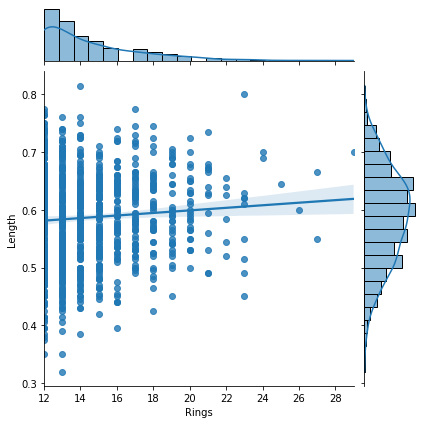

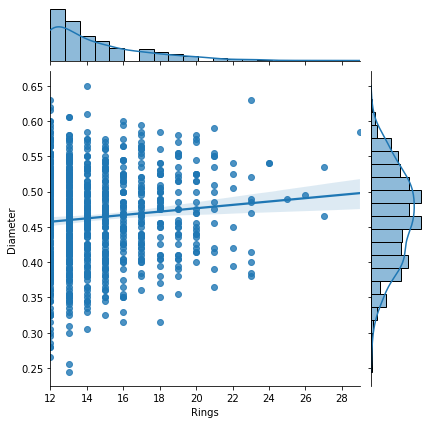

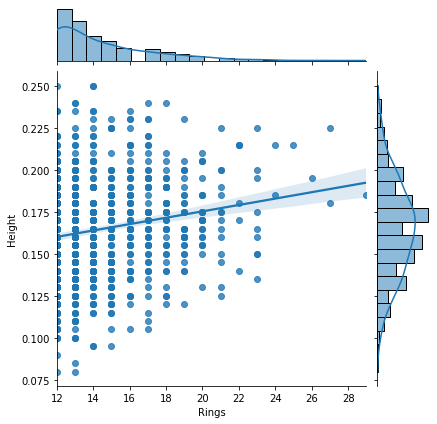

In [128]:
plt.figure(figsize=(20, 5))

_ = sns.jointplot(data=df12, x='Rings', y='Length',  kind='reg')
_ = sns.jointplot(data=df12, x='Rings', y='Diameter', kind='reg')
_ = sns.jointplot(data=df12, x='Rings', y='Height', kind='reg')

<Figure size 1440x360 with 0 Axes>

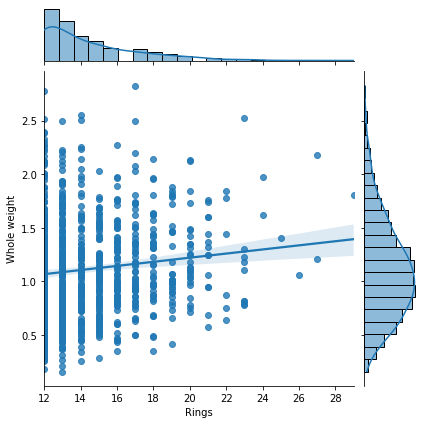

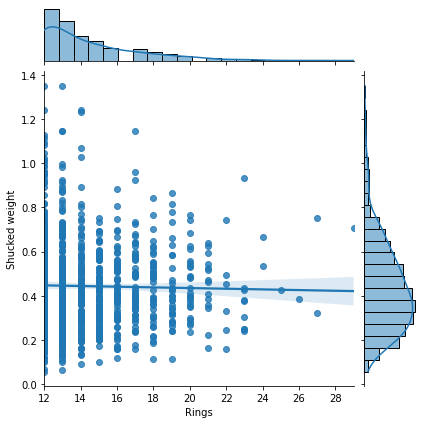

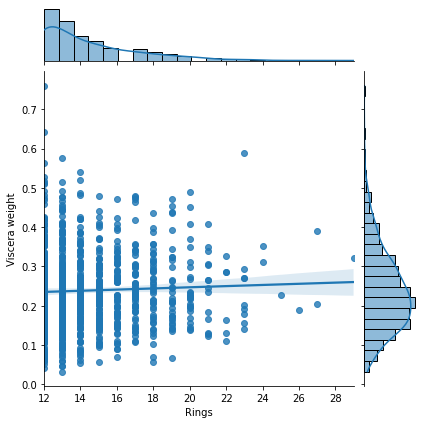

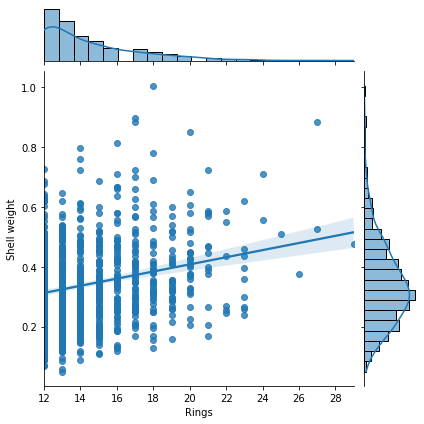

In [129]:
plt.figure(figsize=(20, 5))
_ = sns.jointplot(data=df12, x='Rings', y='Whole weight',  kind='reg')
_ = sns.jointplot(data=df12, x='Rings', y='Shucked weight', kind='reg')
_ = sns.jointplot(data=df12, x='Rings', y='Viscera weight', kind='reg')
_ = sns.jointplot(data=df12, x='Rings', y='Shell weight', kind='reg')

12살 이후부터는 모든 컬럼이 관계가 없음을 알 수 있습니다.
-> 각 연령대에 컬럼들이 평균값, 중앙값의 변화가 오르락내리락합니다.

In [145]:
df12_12length=df12.loc[(df12['Rings']==12)]
df12_13length=df12.loc[(df12['Rings']==13)]
df12_14length=df12.loc[(df12['Rings']==14)]
df12_15length=df12.loc[(df12['Rings']==15)]
df12_16length=df12.loc[(df12['Rings']==16)]
df12_17length=df12.loc[(df12['Rings']==17)]
df12_18length=df12.loc[(df12['Rings']==18)]
df12_19length=df12.loc[(df12['Rings']==19)]
df12_20length=df12.loc[(df12['Rings']==20)]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
15,M,0.500,0.400,0.130,0.6645,0.2580,0.1330,0.2400,12
22,F,0.565,0.440,0.155,0.9395,0.4275,0.2140,0.2700,12
27,M,0.590,0.445,0.140,0.9310,0.3560,0.2340,0.2800,12
66,F,0.565,0.440,0.160,0.9150,0.3540,0.1935,0.3200,12
81,M,0.620,0.510,0.175,1.6150,0.5105,0.1920,0.6750,12
...,...,...,...,...,...,...,...,...,...
4008,M,0.585,0.455,0.155,1.1330,0.5515,0.2230,0.3050,12
4040,F,0.575,0.450,0.120,0.9585,0.4470,0.1690,0.2750,12
4091,M,0.625,0.500,0.180,1.3705,0.6450,0.3030,0.3705,12
4096,F,0.635,0.500,0.175,1.4770,0.6840,0.3005,0.3900,12


In [144]:
print(df12_12length['Height'].values.mean())
print(df12_13length['Height'].values.mean())
print(df12_14length['Height'].values.mean())
print(df12_15length['Height'].values.mean())
print(df12_16length['Height'].values.mean())
print(df12_17length['Height'].values.mean())
print(df12_18length['Height'].values.mean())
print(df12_19length['Height'].values.mean())
print(df12_20length['Height'].values.mean())

0.16129213483146065
0.16088669950738915
0.1635714285714286
0.16135922330097088
0.17186567164179103
0.17396551724137926
0.17154761904761906
0.1703125
0.17384615384615387


# Conclusion

전복은 11년까지는 성장하는 것을 알 수 있다.

전복은 11년 이후로는 연령대와 다른 속성들의 관계가 적다.

연령별로 성별 F와 M은 유사한 수로 존재하고 I는 이 성별보다는 적다.

성별 F와 M의 속성들의 값과 분포는 차이가 적다.

성별 I는 다른 성별그룹보다 모든 속성들의 평균 값이 낮다.

나이(Rings)는 다른 속성들과 상관관계가 적다.

속성 Height가 상대적으로 다른 속성들의 상관관계보다 낮게 나온다. 이유는 성별 F의 outlier가 속성 Height가 다른 속성과의 상관관계를 낮추는데 큰 역할을 한다.

성별 F와 M보다는 성별 I의 데이터 분포가 매우 밀집되어 있다. 이에 비해 성별 F와 M의 데이터 분포는 퍼져 있고 성별 F와 M의 데이터 분포가 비슷해 친밀도가 높은 것을 알 수 있다.